'''

Author: Prathamesh Deshpande<br>
Date: 14-11-24<br>
Last modified by: Prathamesh Deshpande<br>
Last modified time:<br>
Title:  Logistic Regression Model to predict whether client will subscribe to term deposit <br>

'''

Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
 

Import Dataset

In [2]:
df = pd.read_csv("bank.csv",sep=";")

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Analyzing The Dataset

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Check for Missing Values

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

check for Outliers

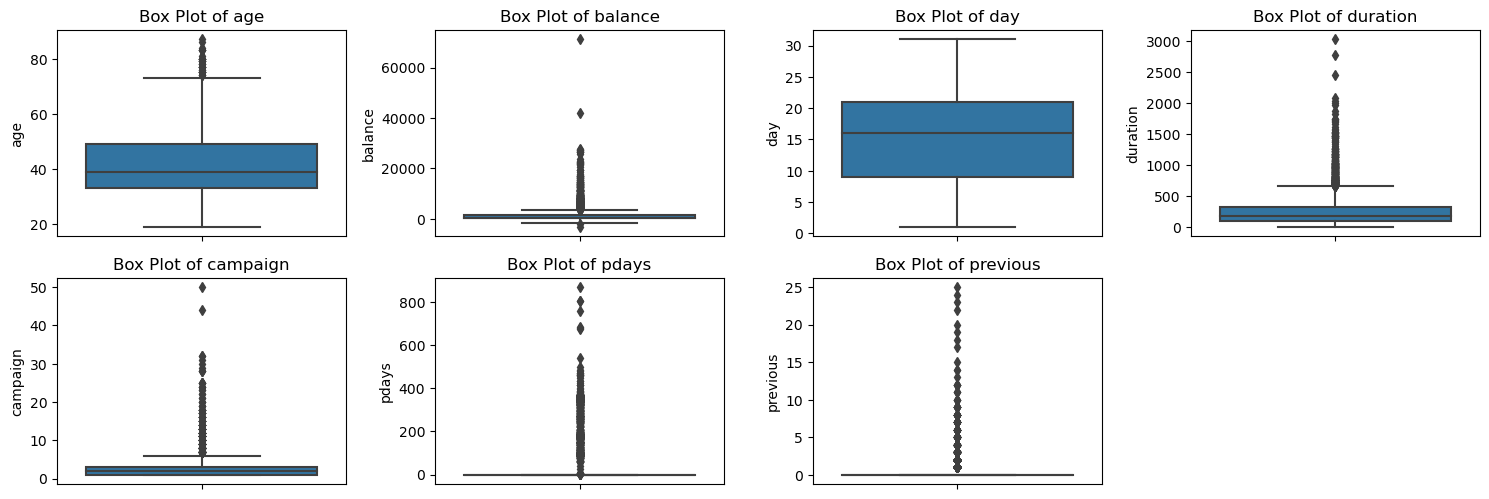

In [7]:
# Select only numerical columns
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Visualizing the initial data with box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Remove Outliers

In [8]:
# Removing outliers using IQR for numerical columns
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtering the data to remove outliers
df_filtered = df[~((df[num_columns] < (Q1 - 1.5 * IQR)) | (df[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

Original data shape: (4521, 17)
Filtered data shape: (2803, 17)


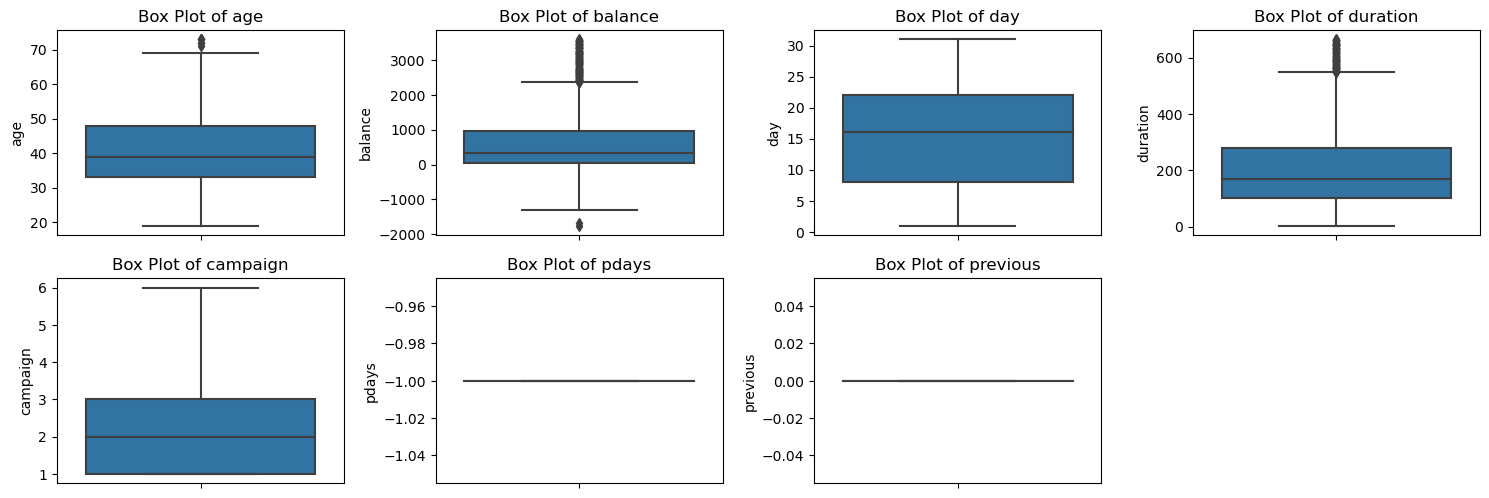

In [9]:
# Select only numerical columns
num_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()

# Visualizing the initial data with box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Handling Categorical Data

In [20]:
df_filtered['job'].unique()

array(['unemployed', 'management', 'blue-collar', 'technician',
       'entrepreneur', 'admin.', 'student', 'services', 'housemaid',
       'self-employed', 'retired', 'unknown'], dtype=object)

In [21]:
df_filtered['education'].unique()

array(['primary', 'tertiary', 'secondary', 'unknown'], dtype=object)

In [22]:
ordinal_categorical_columns =categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OrdinalEncoder()
df_encoded = df_filtered.copy()
df_encoded[ordinal_categorical_columns] = encoder.fit_transform(df_encoded[ordinal_categorical_columns])

In [23]:
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1.0,0.0,0.0,1787,0.0,0.0,0.0,19,10.0,79,1,-1,0,0.0,no
3,30,4.0,1.0,2.0,0.0,1476,1.0,1.0,2.0,3,6.0,199,4,-1,0,0.0,no
4,59,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,5,8.0,226,1,-1,0,0.0,no
7,39,9.0,1.0,1.0,0.0,147,1.0,0.0,0.0,6,8.0,151,2,-1,0,0.0,no
8,41,2.0,1.0,2.0,0.0,221,1.0,0.0,2.0,14,8.0,57,2,-1,0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,36,9.0,0.0,1.0,0.0,566,1.0,0.0,2.0,20,8.0,129,2,-1,0,0.0,no
4512,40,1.0,1.0,1.0,0.0,1100,1.0,0.0,2.0,29,8.0,660,2,-1,0,0.0,no
4513,49,1.0,1.0,1.0,0.0,322,0.0,0.0,0.0,14,1.0,356,2,-1,0,0.0,no
4515,32,7.0,2.0,1.0,0.0,473,1.0,0.0,0.0,7,5.0,624,5,-1,0,0.0,no


Split Data into Dependent and indepnedent variable

In [24]:
# Encoding the target variable 'y' and keeping only numerical features
y = df_encoded['y'].map({'yes': 1, 'no': 0})  # Target variable (convert to binary)
X = df_encoded.drop(columns=['y'])  # Drop the target variable column
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0.0,1787,0.0,0.0,0.0,19,10.0,79,1,-1,0,0.0
3,30,4.0,1.0,2.0,0.0,1476,1.0,1.0,2.0,3,6.0,199,4,-1,0,0.0
4,59,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,5,8.0,226,1,-1,0,0.0
7,39,9.0,1.0,1.0,0.0,147,1.0,0.0,0.0,6,8.0,151,2,-1,0,0.0
8,41,2.0,1.0,2.0,0.0,221,1.0,0.0,2.0,14,8.0,57,2,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,36,9.0,0.0,1.0,0.0,566,1.0,0.0,2.0,20,8.0,129,2,-1,0,0.0
4512,40,1.0,1.0,1.0,0.0,1100,1.0,0.0,2.0,29,8.0,660,2,-1,0,0.0
4513,49,1.0,1.0,1.0,0.0,322,0.0,0.0,0.0,14,1.0,356,2,-1,0,0.0
4515,32,7.0,2.0,1.0,0.0,473,1.0,0.0,0.0,7,5.0,624,5,-1,0,0.0


Check Corelation

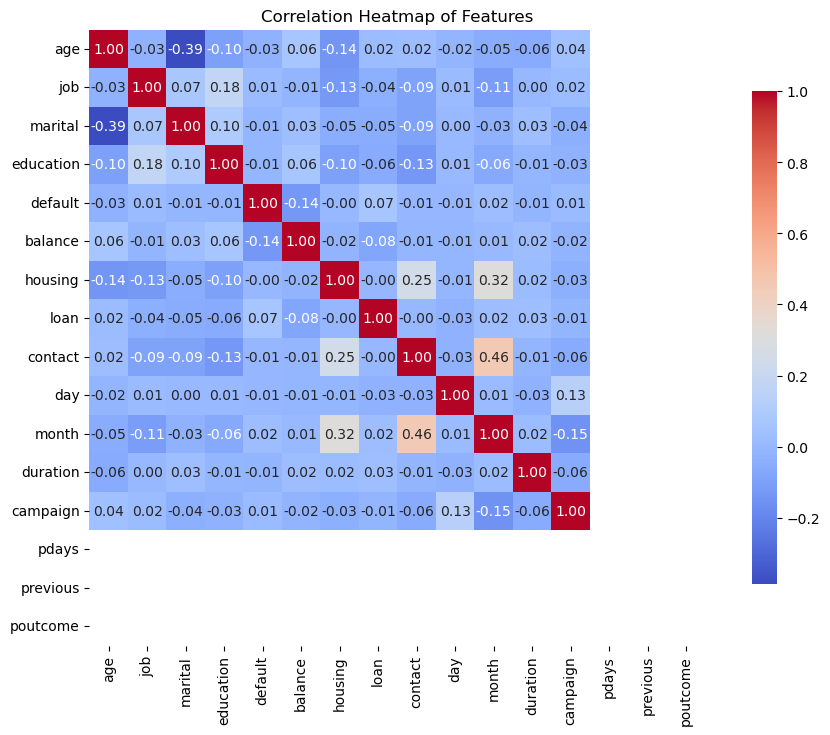

In [25]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

In [29]:
X = X.drop(columns=['pdays','previous','poutcome'])
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,30,10.0,1.0,0.0,0.0,1787,0.0,0.0,0.0,19,10.0,79,1
3,30,4.0,1.0,2.0,0.0,1476,1.0,1.0,2.0,3,6.0,199,4
4,59,1.0,1.0,1.0,0.0,0,1.0,0.0,2.0,5,8.0,226,1
7,39,9.0,1.0,1.0,0.0,147,1.0,0.0,0.0,6,8.0,151,2
8,41,2.0,1.0,2.0,0.0,221,1.0,0.0,2.0,14,8.0,57,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,36,9.0,0.0,1.0,0.0,566,1.0,0.0,2.0,20,8.0,129,2
4512,40,1.0,1.0,1.0,0.0,1100,1.0,0.0,2.0,29,8.0,660,2
4513,49,1.0,1.0,1.0,0.0,322,0.0,0.0,0.0,14,1.0,356,2
4515,32,7.0,2.0,1.0,0.0,473,1.0,0.0,0.0,7,5.0,624,5


Train Test Split

In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building

In [32]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

Evaluate Model Performance

Accuracy: 0.9554367201426025
Confusion Matrix:
 [[532   1]
 [ 24   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       533
           1       0.80      0.14      0.24        28

    accuracy                           0.96       561
   macro avg       0.88      0.57      0.61       561
weighted avg       0.95      0.96      0.94       561



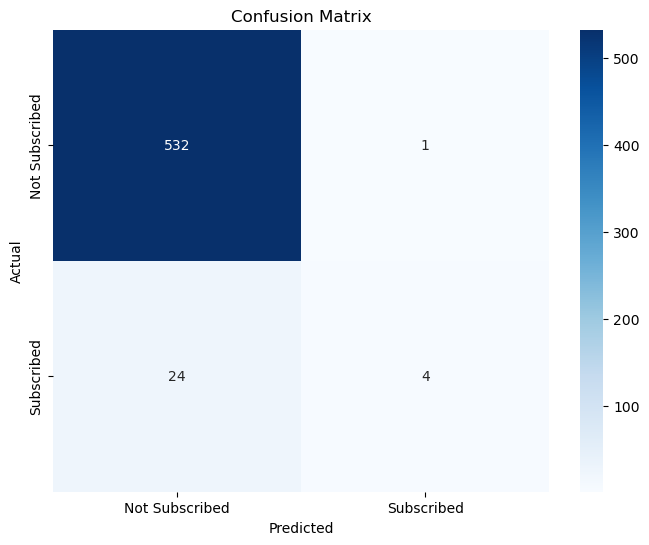

In [33]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()